<a href="https://colab.research.google.com/github/omar4646/My_repository/blob/main/Classification_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random linear classification algorith

In [2]:
np.random.seed(0)

In [3]:
dog_whisker_lenght = np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappines = np.random.normal(loc=8, scale=1, size=10)

cat_whisker_lenght = np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappines = np.random.normal(loc=5, scale=1, size=10)

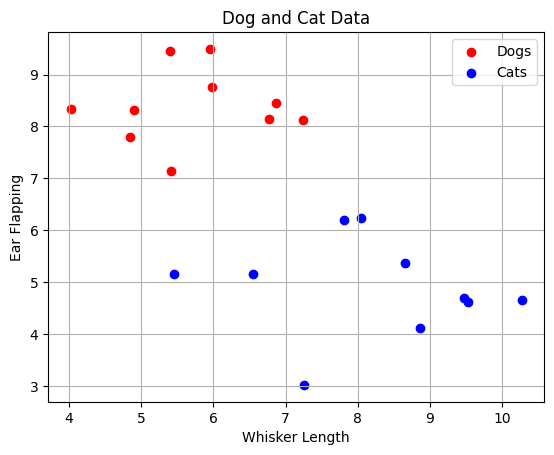

In [4]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()

Let's outline a simple random linear classification algorithm. This is a basic conceptual algorithm, not a standard, widely-used one.

**Algorithm: Random Linear Classifier**

1.  **Initialization:**
    *   Initialize a weight vector $\mathbf{w} \in \mathbb{R}^d$ and a bias term $b \in \mathbb{R}$ with random values. These values can be drawn from a standard normal distribution, for example.
    *   $ \mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $
    *   $ b \sim \mathcal{N}(0, 1) $

2.  **Classification of a new data point $\mathbf{x}$:**
    *   Calculate the linear combination of the input features and the weights, and add the bias term:
        $ z = \mathbf{w}^T \mathbf{x} + b $
    *   Classify the data point based on the sign of $z$:
        $ \text{predicted class} = \begin{cases} +1 & \text{if } z \ge 0 \\ -1 & \text{if } z < 0 \end{cases} $

This algorithm simply assigns a random decision boundary and uses it for classification. It does not involve any training or learning from the data.

In [5]:
def random_linear_classifier(data_dog, data_cat, k, d):
  best_theta = None
  best_theta0 = None
  best_error = float('inf')

  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dog, data_cat, theta, theta0)
    if error < best_error:
      best_theta = theta
      best_theta0 = theta0
      best_error = error

  return best_theta, best_theta0, best_error

In [6]:
#Compute error
def compute_error(data_dog, data_cat, theta, theta0):
  error = 0
  for x_dog in data_dog:
    if np.dot(x_dog, theta) + theta0 <= 0:
      error += 1
  for x_cat in data_cat:
    if np.dot(x_cat, theta) + theta0 > 0:
      error += 1
  return error

In [7]:
data_dog = np.vstack([dog_whisker_lenght, dog_ear_flappines]).T
data_cat = np.vstack([cat_whisker_lenght, cat_ear_flappines]).T

In [8]:
k = 1000
d = 2
best_theta, best_theta0, best_error = random_linear_classifier(data_dog, data_cat, k, d)

In [9]:
print(best_theta, best_theta0, best_error)

[-1.07075262  1.05445173] -0.40317694697317963 0


In [10]:
x_val = np.linspace(2, 10, 100)
y_val = -(best_theta[0] * x_val + best_theta0) / best_theta[1]

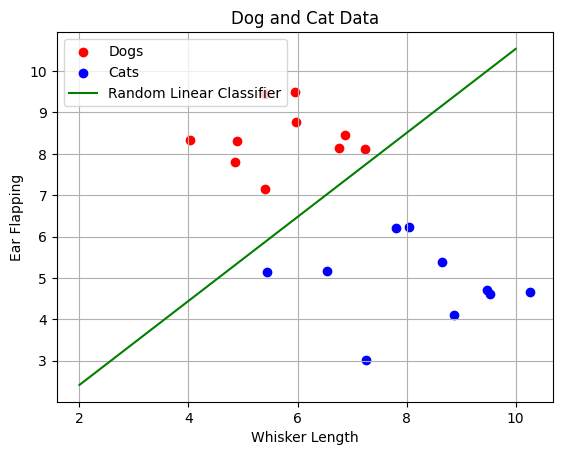

In [11]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.plot(x_val, y_val, color='green', label='Random Linear Classifier')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()

# Perceptron Learning Algorithm

Let's outline the Perceptron Learning Algorithm.

**Algorithm: Perceptron Learning Algorithm**

1. **Initialization:**
   * Initialize the weight vector $\mathbf{w} \in \mathbb{R}^d$ and bias term $b \in \mathbb{R}$ to zeros.
   $ \mathbf{w} = \mathbf{0} $
   $ b = 0 $

2. **Iteration:**
   * Iterate through the training data points $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i \in \mathbb{R}^d$ is the feature vector and $y_i \in \{-1, 1\}$ is the corresponding class label.

3. **Update Rule:**
   * For each data point $(\mathbf{x}_i, y_i)$:
     * Calculate the prediction: $ \hat{y}_i = \text{sign}(\mathbf{w}^T \mathbf{x}_i + b) $
     * If the prediction is incorrect ($y_i \hat{y}_i \le 0$), update the weights and bias:
       $ \mathbf{w} \leftarrow \mathbf{w} + y_i \mathbf{x}_i $
       $ b \leftarrow b + y_i $

4. **Termination:**
   * Repeat step 2 until all data points are correctly classified or a maximum number of iterations is reached.

This algorithm is guaranteed to converge for linearly separable data.

In [12]:
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

In [13]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

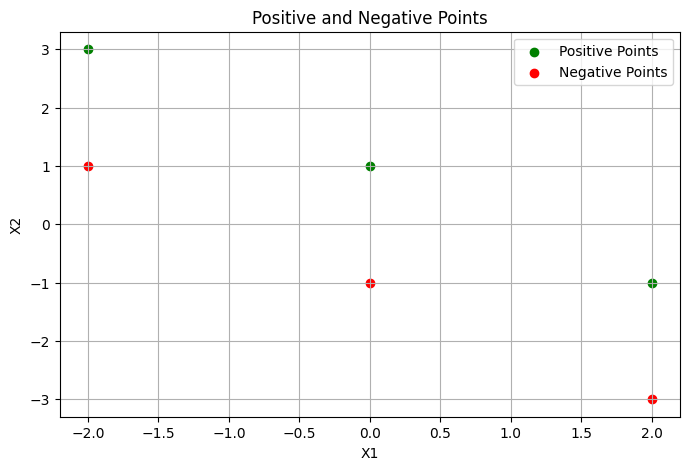

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Positive and Negative Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [16]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [17]:
y

array([ 1,  1,  1, -1, -1, -1])

In [18]:
def perceptron(X, y, epochs=100):
  theta = np.zeros(X.shape[1])
  theta0 = 0
  for t in range(epochs):
    for i, x1 in enumerate(X):
      if y[i] * (np.dot(theta, x1) + theta0) <= 0:
        theta += y[i] * x1
        theta0 += y[i]
        plot_decision_boundary(theta, theta0, t+1) # Plot after each update
        break # The perceptron algorithm updates weights and moves to the next epoch
  return theta, theta0

In [19]:
theta = np.zeros(2)
theta

array([0., 0.])

In [20]:
def plot_decision_boundary(theta, theta0, iteration):
  plt.figure(figsize=(8, 5))
  plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
  plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')

  #Plot decision boundary
  x_values = np.linspace(-3, 3, 2)
  #Check for theta[1] to avoid division by 0 in case of vertical line
  if theta[1] != 0:
    y_values = -(theta[0] * x_values + theta0) / theta[1]
    plt.plot(x_values, y_values, 'b', label=f'Decision Boundary (Iteration {iteration})')
  else:
    x_val = -theta0 / theta[0]
    plt.axvline(x=x_val, color='b', linestyle='--', label=f'Decision Boundary (Iteration {iteration})')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')

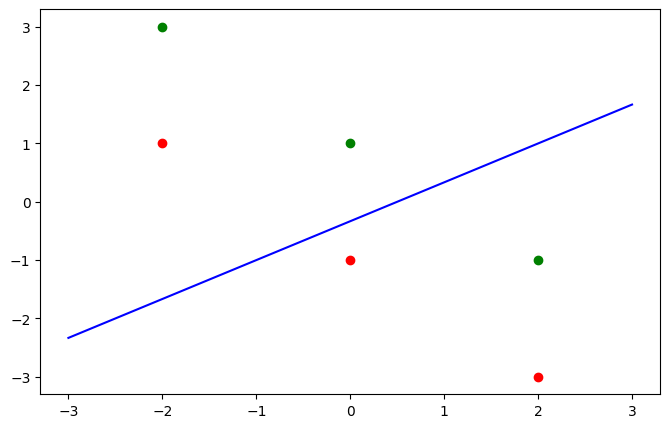

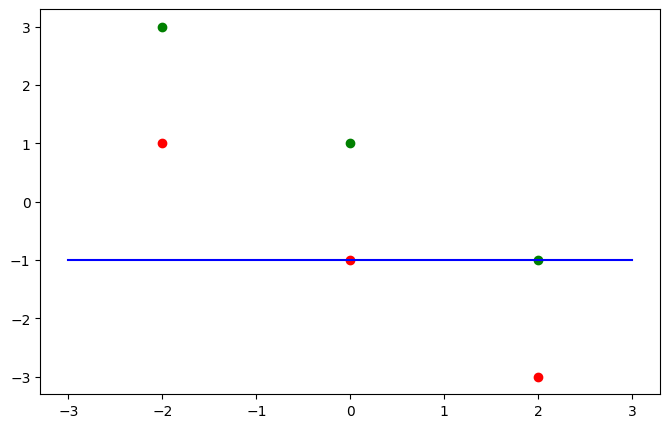

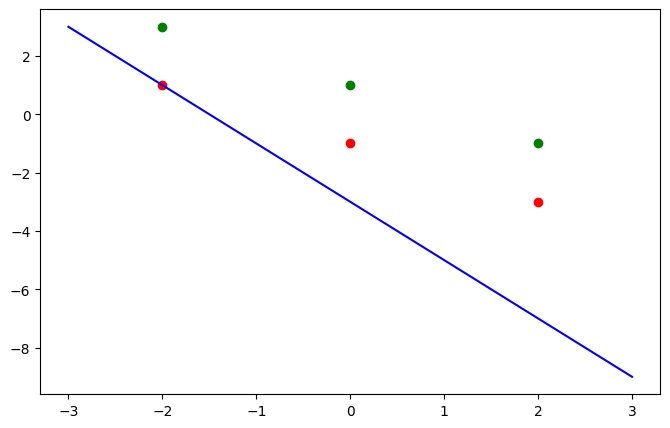

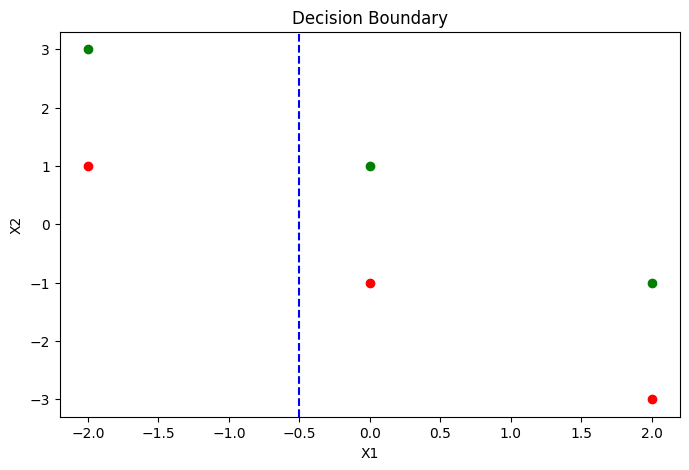

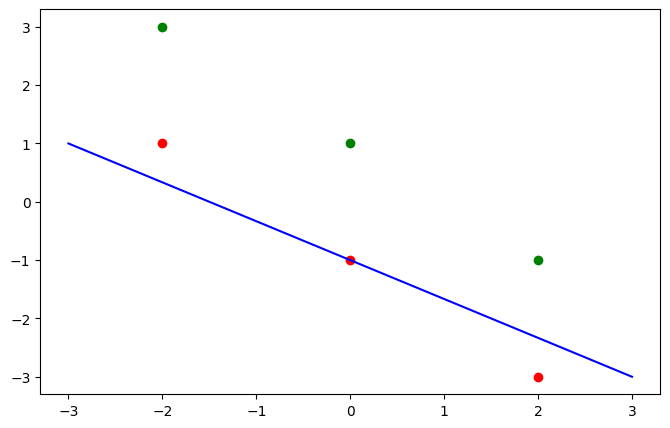

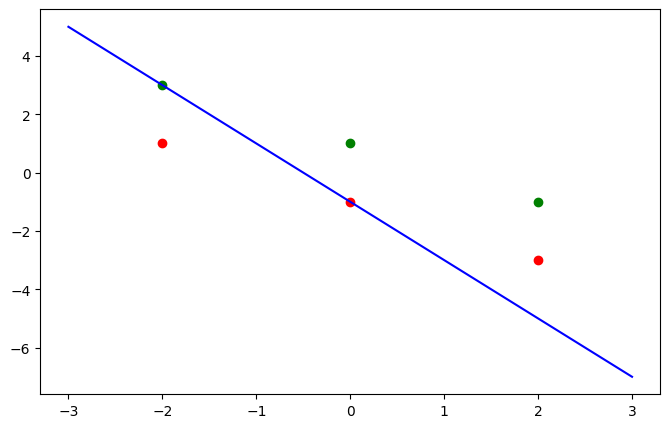

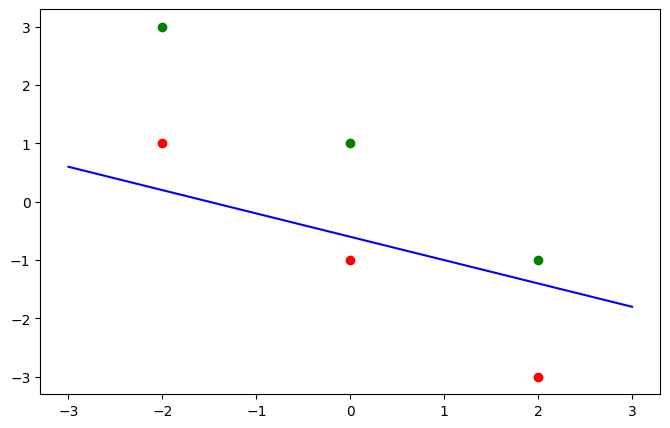

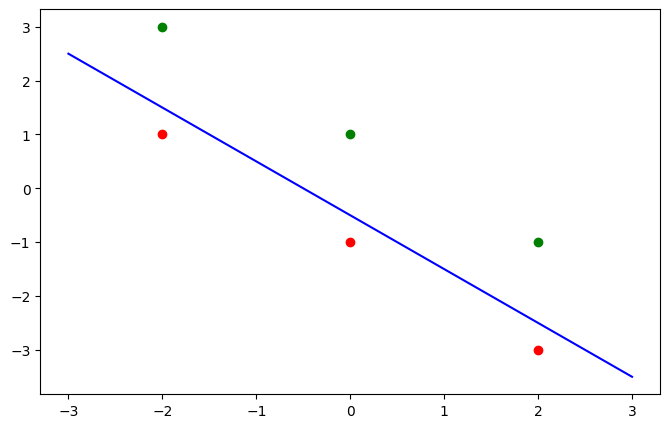

In [21]:
theta_final, theta0_final = perceptron(X, y, 10)

In [26]:
X

array([[-0.39055643, -0.24336686],
       [ 0.27997309,  0.92479803],
       [ 0.47143099, -0.04620414],
       [ 0.86937255,  0.04751848],
       [-0.36368624,  0.21769883],
       [-0.8304193 ,  0.55066491],
       [ 0.11934131, -0.58250929],
       [ 0.27754325, -0.92117049],
       [-0.68104259, -0.5680736 ],
       [ 0.16061946,  0.44975648]])

In [1]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_circles

# 1. Generate a linearly inseparable dataset in 2D (concentric circles)
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)

# 2. Define a feature transformation: (x1, x2) -> (x1, x2, x1^2 + x2^2)
X_transformed = np.c_[X, (X[:,0]**2 + X[:,1]**2)]

# 3. Plot the original 2D dataset
fig2d = go.Figure()
fig2d.add_trace(go.Scatter(
    x=X[y==0,0], y=X[y==0,1],
    mode="markers", name="Class 0",
    marker=dict(color="blue", size=7, line=dict(width=1, color="black"))
))
fig2d.add_trace(go.Scatter(
    x=X[y==1,0], y=X[y==1,1],
    mode="markers", name="Class 1",
    marker=dict(color="red", size=7, line=dict(width=1, color="black"))
))
fig2d.update_layout(
    title="Linearly Inseparable Dataset in 2D (Circles)",
    xaxis_title="x1",
    yaxis_title="x2",
    width=600, height=600
)

# 4. Plot the transformed dataset in 3D
fig3d = go.Figure()
fig3d.add_trace(go.Scatter3d(
    x=X_transformed[y==0,0], y=X_transformed[y==0,1], z=X_transformed[y==0,2],
    mode="markers", name="Class 0",
    marker=dict(color="blue", size=4)
))
fig3d.add_trace(go.Scatter3d(
    x=X_transformed[y==1,0], y=X_transformed[y==1,1], z=X_transformed[y==1,2],
    mode="markers", name="Class 1",
    marker=dict(color="red", size=4)
))
fig3d.update_layout(
    title="Dataset After Feature Transformation to 3D",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="x1^2 + x2^2"
    ),
    width=700, height=700
)

# Show plots
fig2d.show()
fig3d.show()


In [50]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df = {
    'employee_id': [10, 14, 15, 21, 9, 4, 13, 20],
    'gender': ['f', 'f', 'm', 'f', 'm', 'm', 'f', 'f'],
    'performance': ['good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad']}

df = pd.DataFrame(df)
columns_to_encode = df.select_dtypes(include = ['object']).columns.to_list()
encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([df, encoded_df], axis = 1)


In [51]:
df

,employee_id,gender,performance,gender_f,gender_m,performance_bad,performance_good
0,10,f,good,1.0,0.0,0.0,1.0
1,14,f,bad,1.0,0.0,1.0,0.0
2,15,m,bad,0.0,1.0,1.0,0.0
3,21,f,good,1.0,0.0,0.0,1.0
4,9,m,good,0.0,1.0,0.0,1.0
5,4,m,bad,0.0,1.0,1.0,0.0
6,13,f,good,1.0,0.0,0.0,1.0
7,20,f,bad,1.0,0.0,1.0,0.0
